In [69]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Visleshana Dataset.csv


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [71]:
data  = pd.read_csv('/kaggle/input/Visleshana Dataset.csv', engine = 'python')

In [72]:
print(data.head())

   Row ID        Order ID  Order Date   Ship Date Customer ID        Country  \
0       1  CA-2018-152156   8/11/2018  11/11/2018    CG-12520  United States   
1       2  CA-2018-152156   8/11/2018  11/11/2018    CG-12520  United States   
2       3  CA-2018-138688   12/6/2018  16-06-2018    DV-13045  United States   
3       4  US-2017-108966  11/10/2017  18-10-2017    SO-20335  United States   
4       5  US-2017-108966  11/10/2017  18-10-2017    SO-20335  United States   

              City       State  Postal Code Region       Product ID  \
0        Henderson    Kentucky      42420.0  South  FUR-BO-10001798   
1        Henderson    Kentucky      42420.0  South  FUR-CH-10000454   
2      Los Angeles  California      90036.0   West  OFF-LA-10000240   
3  Fort Lauderdale     Florida      33311.0  South  FUR-TA-10000577   
4  Fort Lauderdale     Florida      33311.0  South  OFF-ST-10000760   

          Category Sub-Category  \
0        Furniture    Bookcases   
1        Furniture    

In [73]:
data.rename(columns={
    'Row ID': 'RowID',
    'Order ID': 'OrderID',
    'Order Date': 'OrderDate',
    'Ship Date': 'ShipDate',
    'Customer ID': 'CustomerID',
    'Postal Code': 'PostalCode',
    'Product ID': 'ProductID',
    'Product Name': 'ProductName'

}, inplace=True)

In [74]:
type(data.OrderDate)

data['OrderDate'] = pd.to_datetime(data['OrderDate'])
data.head()

,RowID,OrderID,OrderDate,ShipDate,CustomerID,Country,City,State,PostalCode,Region,ProductID,Category,Sub-Category,ProductName,Sales,Quantity
0,1,CA-2018-152156,2018-08-11,11/11/2018,CG-12520,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2
1,2,CA-2018-152156,2018-08-11,11/11/2018,CG-12520,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3
2,3,CA-2018-138688,2018-12-06,16-06-2018,DV-13045,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,1
3,4,US-2017-108966,2017-11-10,18-10-2017,SO-20335,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7
4,5,US-2017-108966,2017-11-10,18-10-2017,SO-20335,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,1


In [75]:
LatestDate = data.OrderDate.max()

In [76]:
LatestDate

Timestamp('2019-12-30 00:00:00')

In [77]:
RFMScores = data.groupby('CustomerID').aggregate({ 'OrderDate': lambda x: (LatestDate - x.max()).days ,'OrderID': lambda x: len(x), 'Sales': lambda x: x.sum()})

In [78]:
RFMScores

,OrderDate,OrderID,Sales
CustomerID,,,
AA-10315,184,11,5563.560
AA-10375,48,15,1056.390
AA-10480,259,12,1790.512
AA-10645,37,33,10617.937
AB-10015,445,6,886.156
...,...,...,...
XP-21865,43,28,2374.658
YC-21895,4,8,5454.350
YS-21880,9,12,6720.444


In [79]:
RFMScores['OrderDate'] = RFMScores['OrderDate'].astype(int)

In [80]:
RFMScores.reset_index().head()

,CustomerID,OrderDate,OrderID,Sales
0,AA-10315,184,11,5563.560
1,AA-10375,48,15,1056.390
2,AA-10480,259,12,1790.512
3,AA-10645,37,33,10617.937
4,AB-10015,445,6,886.156


In [81]:
RFMScores.rename(columns={
    'OrderDate': 'Recency',
    'OrderID': 'Frequency',
    'Sales': 'Moneytory',
}, inplace=True)

In [82]:
quantiles = RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 36.0, 0.5: 92.0, 0.75: 216.0},
 'Frequency': {0.25: 8.0, 0.5: 12.0, 0.75: 17.0},
 'Moneytory': {0.25: 1203.3339999999998,
  0.5: 2302.3680000000004,
  0.75: 3908.2619999999997}}

In [83]:
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    

def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [84]:
RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFMScores['M'] = RFMScores['Moneytory'].apply(FnMScoring, args=('Moneytory',quantiles,))

In [85]:
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

In [86]:
RFMScores['RFMScore'] = RFMScores[['R', 'F', 'M']].sum(axis = 1)
RFMScores.head()

,Recency,Frequency,Moneytory,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
AA-10315,184,11,5563.560,2,2,4,224,8
AA-10375,48,15,1056.390,3,3,1,331,7
AA-10480,259,12,1790.512,1,2,2,122,5
AA-10645,37,33,10617.937,3,4,4,344,11
AB-10015,445,6,886.156,1,1,1,111,3


In [87]:
Loyalty_Level = ['Bronze',  'Silver','Gold', 'Platinum']
Score_cuts = pd.qcut(RFMScores.RFMScore, q = 4, labels = Loyalty_Level)
RFMScores['RFM_Loyalty_Level'] = Score_cuts.values
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Moneytory,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,AA-10315,184,11,5563.560,2,2,4,224,8,Gold
1,AA-10375,48,15,1056.390,3,3,1,331,7,Silver
2,AA-10480,259,12,1790.512,1,2,2,122,5,Bronze
3,AA-10645,37,33,10617.937,3,4,4,344,11,Platinum
4,AB-10015,445,6,886.156,1,1,1,111,3,Bronze


In [88]:
import chart_studio as cs
import plotly.offline as po
import plotly.graph_objs as gobj


ModuleNotFoundError: No module named 'chart_studio'

In [89]:
#K Means Clustering

def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num

In [90]:
RFMScores['Recency'] = [handle_neg_n_zero(x) for x in RFMScores.Recency]
RFMScores['Monetory'] = [handle_neg_n_zero(x) for x in RFMScores.Moneytory]

Log_Tfd_Data = RFMScores[['Recency', 'Frequency', 'Moneytory']].apply(np.log, axis = 1).round(3)


In [91]:

from sklearn.preprocessing import StandardScaler

In [92]:
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_Data)


In [93]:
Scaled_Data = pd.DataFrame(Scaled_Data, index = RFMScores.index, columns = Log_Tfd_Data.columns)


In [94]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_


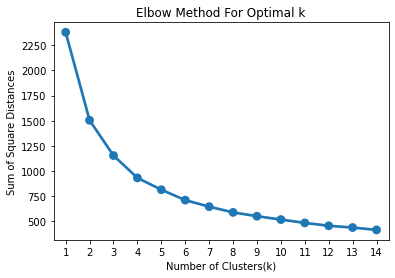

In [95]:
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [96]:
KMean_clust = KMeans(n_clusters= 4, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(Scaled_Data)


KMeans(max_iter=1000, n_clusters=4)

In [97]:
RFMScores['Cluster'] = KMean_clust.labels_
RFMScores.head()


,Recency,Frequency,Moneytory,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Monetory,Cluster
CustomerID,,,,,,,,,,,
AA-10315,184,11,5563.560,2,2,4,224,8,Gold,5563.560,2
AA-10375,48,15,1056.390,3,3,1,331,7,Silver,1056.390,3
AA-10480,259,12,1790.512,1,2,2,122,5,Bronze,1790.512,3
AA-10645,37,33,10617.937,3,4,4,344,11,Platinum,10617.937,2
AB-10015,445,6,886.156,1,1,1,111,3,Bronze,886.156,3


<Figure size 504x504 with 0 Axes>

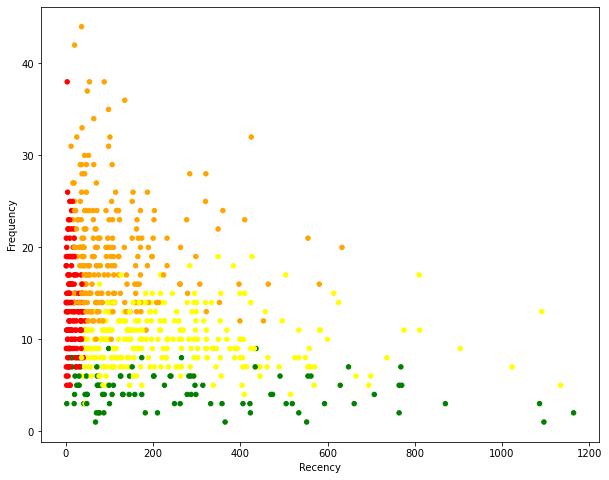

In [98]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "orange","yellow"]
RFMScores['Color'] = RFMScores['Cluster'].map(lambda p: Colors[p])
ax = RFMScores.plot(    
    kind="scatter", 
    x="Recency", y="Frequency",
    figsize=(10,8),
    c = RFMScores['Color']
)

In [103]:
RFMScores.to_csv('Output.csv')

<Figure size 504x504 with 0 Axes>

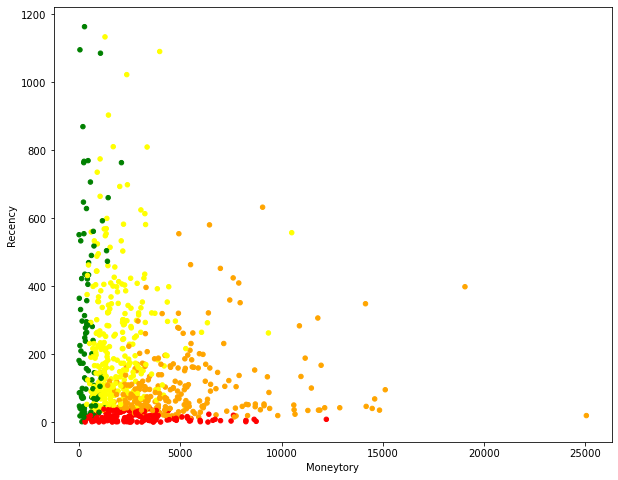

In [100]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

##Scatter Plot Moneytary Vs Recency
Colors = ["red", "green", "orange","yellow"]
RFMScores['Color'] = RFMScores['Cluster'].map(lambda p: Colors[p])
ax = RFMScores.plot(    
    kind="scatter", 
    x="Moneytory", y="Recency",
    figsize=(10,8),
    c = RFMScores['Color']
)

<Figure size 504x504 with 0 Axes>

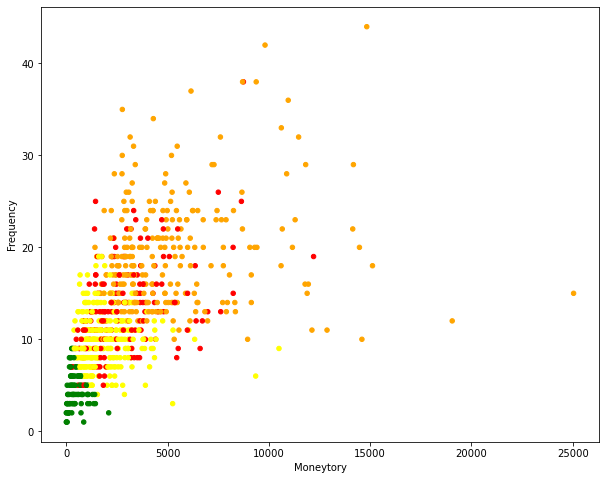

In [102]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

##Scatter Plot Moneytary Vs Recency
Colors = ["red", "green", "orange","yellow"]
RFMScores['Color'] = RFMScores['Cluster'].map(lambda p: Colors[p])
ax = RFMScores.plot(    
    kind="scatter", 
    x="Moneytory", y="Frequency",
    figsize=(10,8),
    c = RFMScores['Color']
)